# Intro to CyberGISX

**Authors:** Alexander Michels, Anand Padmanabhan, Zhaonan Wang and Wei Hu

This notebook is a quick crash course on JupyterLab and CyberGISX.

## Table of Contents

* [Jupyter Interface](#jupyter)
* [Example Packages](#examples)
* [Notes on Using CyberGISX](#notes)
* [Learn More](#learn-more)

In [1]:
import os
import time

<hr id="jupyter" />

## Jupyter Interface

The landing page for JupyterLab looks like this:

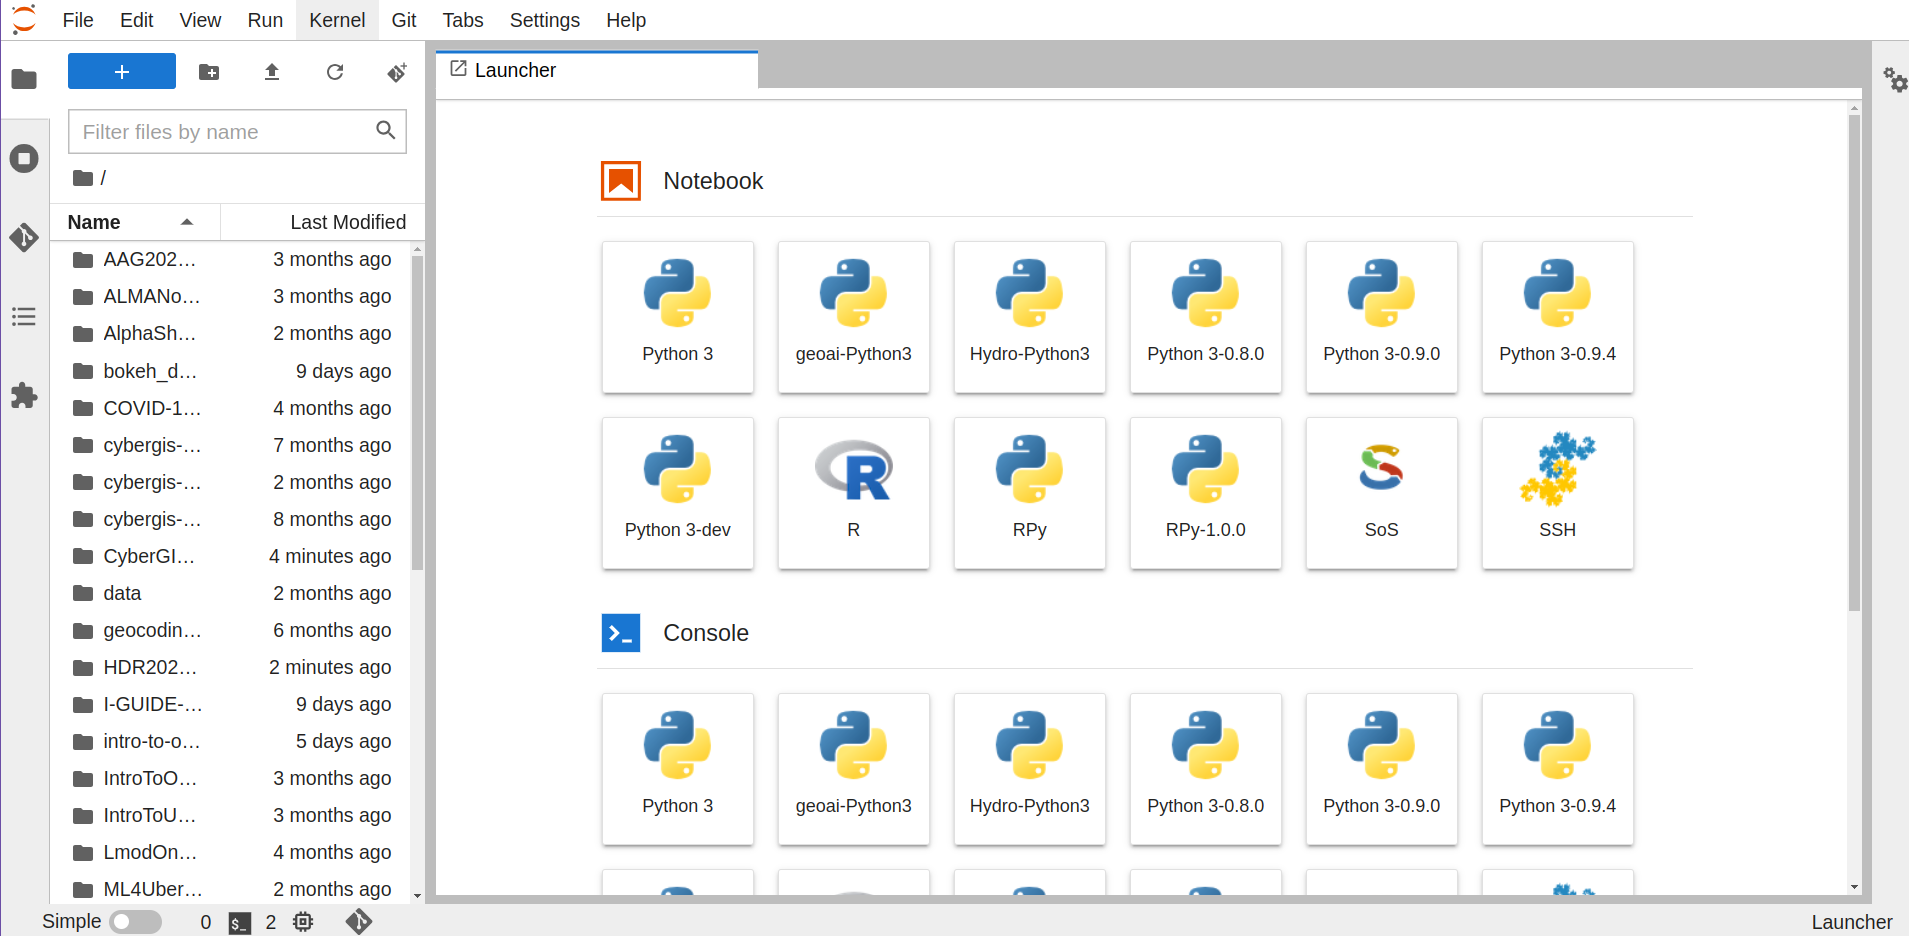

We skipped this landing page by opening a notebook directly, but you can always access this screen by clicking the blue "+" button in the top-left. This allows you to open new notebooks with various kernels, launch a console with different software environments and if you scroll down:

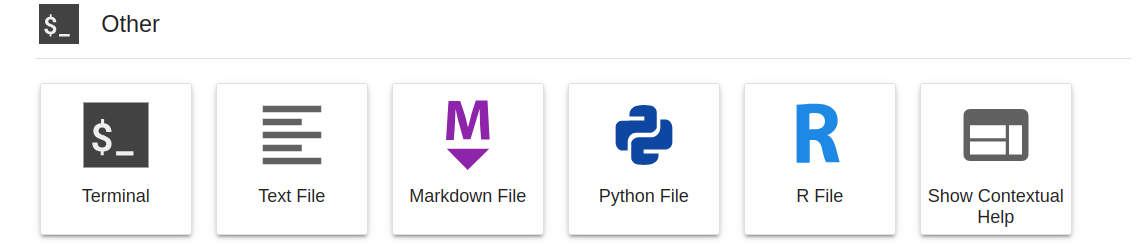

You can open the terminal or create other types of files.

### Menus

At the very top of the screen, you can view various menus:

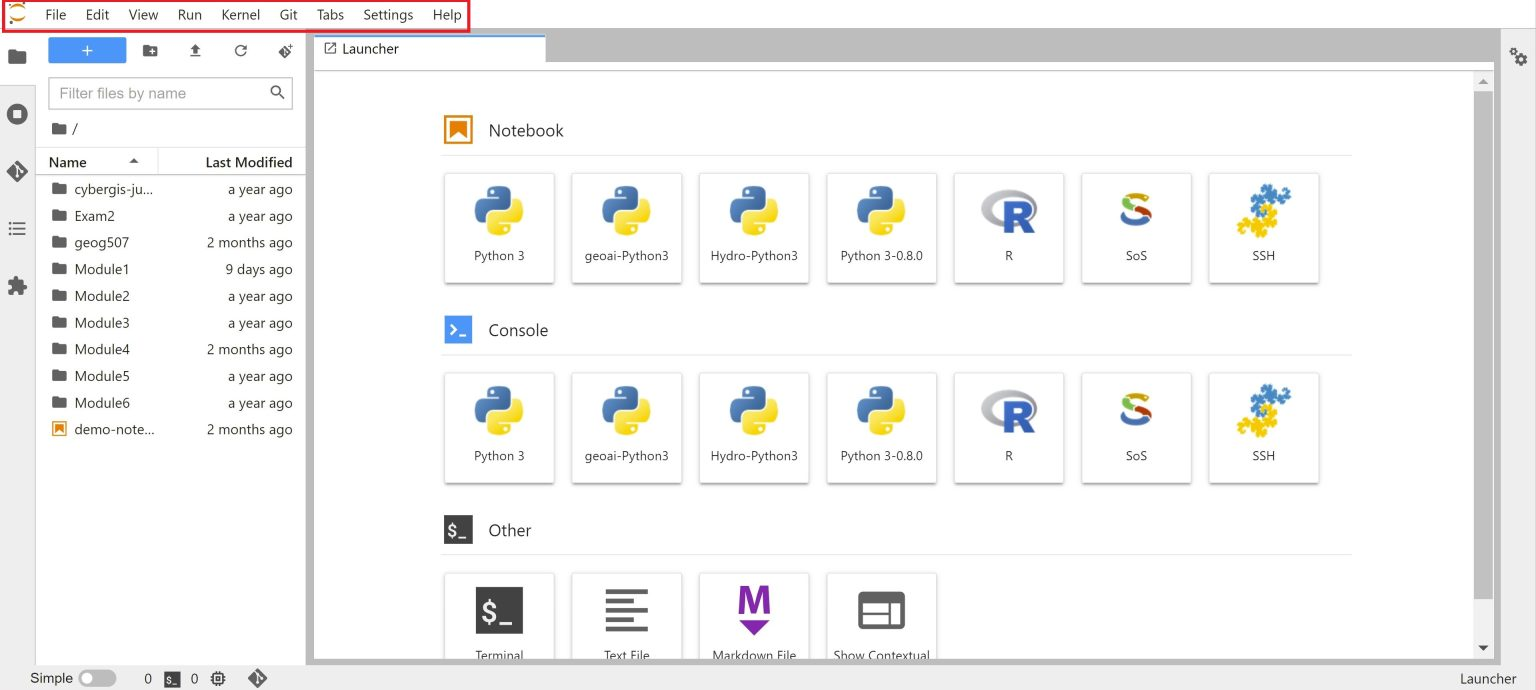

* **The File Menu** The File menu can be used for basic operations such as opening and closing tabs, saving work, reloading, and downloading and exporting content. Additionally, the Jupyter Control Panel can be accessed from this menu (File -> Hub Control Panel) to stop and restart your Jupyter server.

* **The Edit Menu** The Edit menu allows for edit operations within the current cell. You can add, delete, edit, select, copy, move, and merge/split code and display cells. You can also search content or jump to a line within this menu.

* **The View Menu** The View menu controls how content within JupiterLab is displayed. With this menu, you can show and hide menus and panels and change how cell content is viewed.

* **The Run Menu**
The Run menu is used to run Jupyter Notebook cells within a tab. The Restart Kernel and Run All command is commonly used when a notebook requires custom installs to run.

* **The Kernel Menu** 
The Kernel menu is used to stop, restart, shut down, and change kernels.

* **The Git Menu** 
The Git menu integrates Git with the CyberGISX development environment. It looks like this:

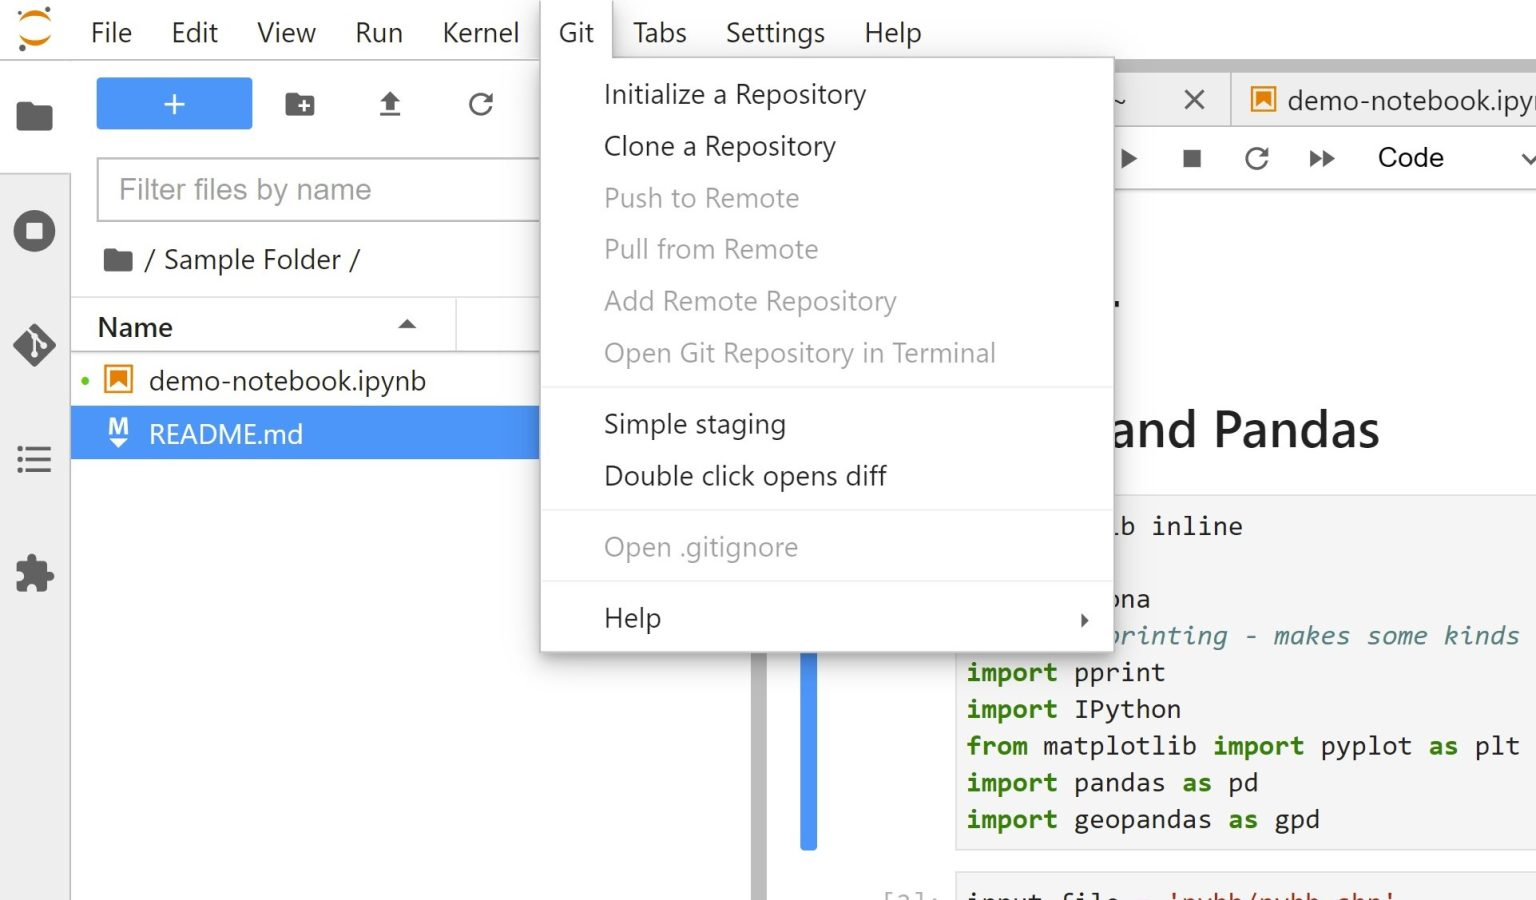

From the Git menu, you can initially click Initialize a Repository or Clone a Repository. Once you are working in a Git repository, you can push or pull to/from your repository from the Git menu. 

* **The Tabs Menu** 
One of the key features of the JupyterLab interface is the ability to have multiple tabs open at once. You can have multiple notebooks, terminal sessions, and other files open at the same time, and can easily toggle between them by clicking on the tab name at the top of the editing window. From the Tabs dropdown menu, you can switch between tabs, see the keyboard shortcuts to switch between tabs, and see a list of the tabs you currently have open.

* **The Settings Menu** 
The JupyterLab interface may be customizable. For example, you can switch JupyterLab into dark mode by clicking Settings -> JupyterLab Theme:

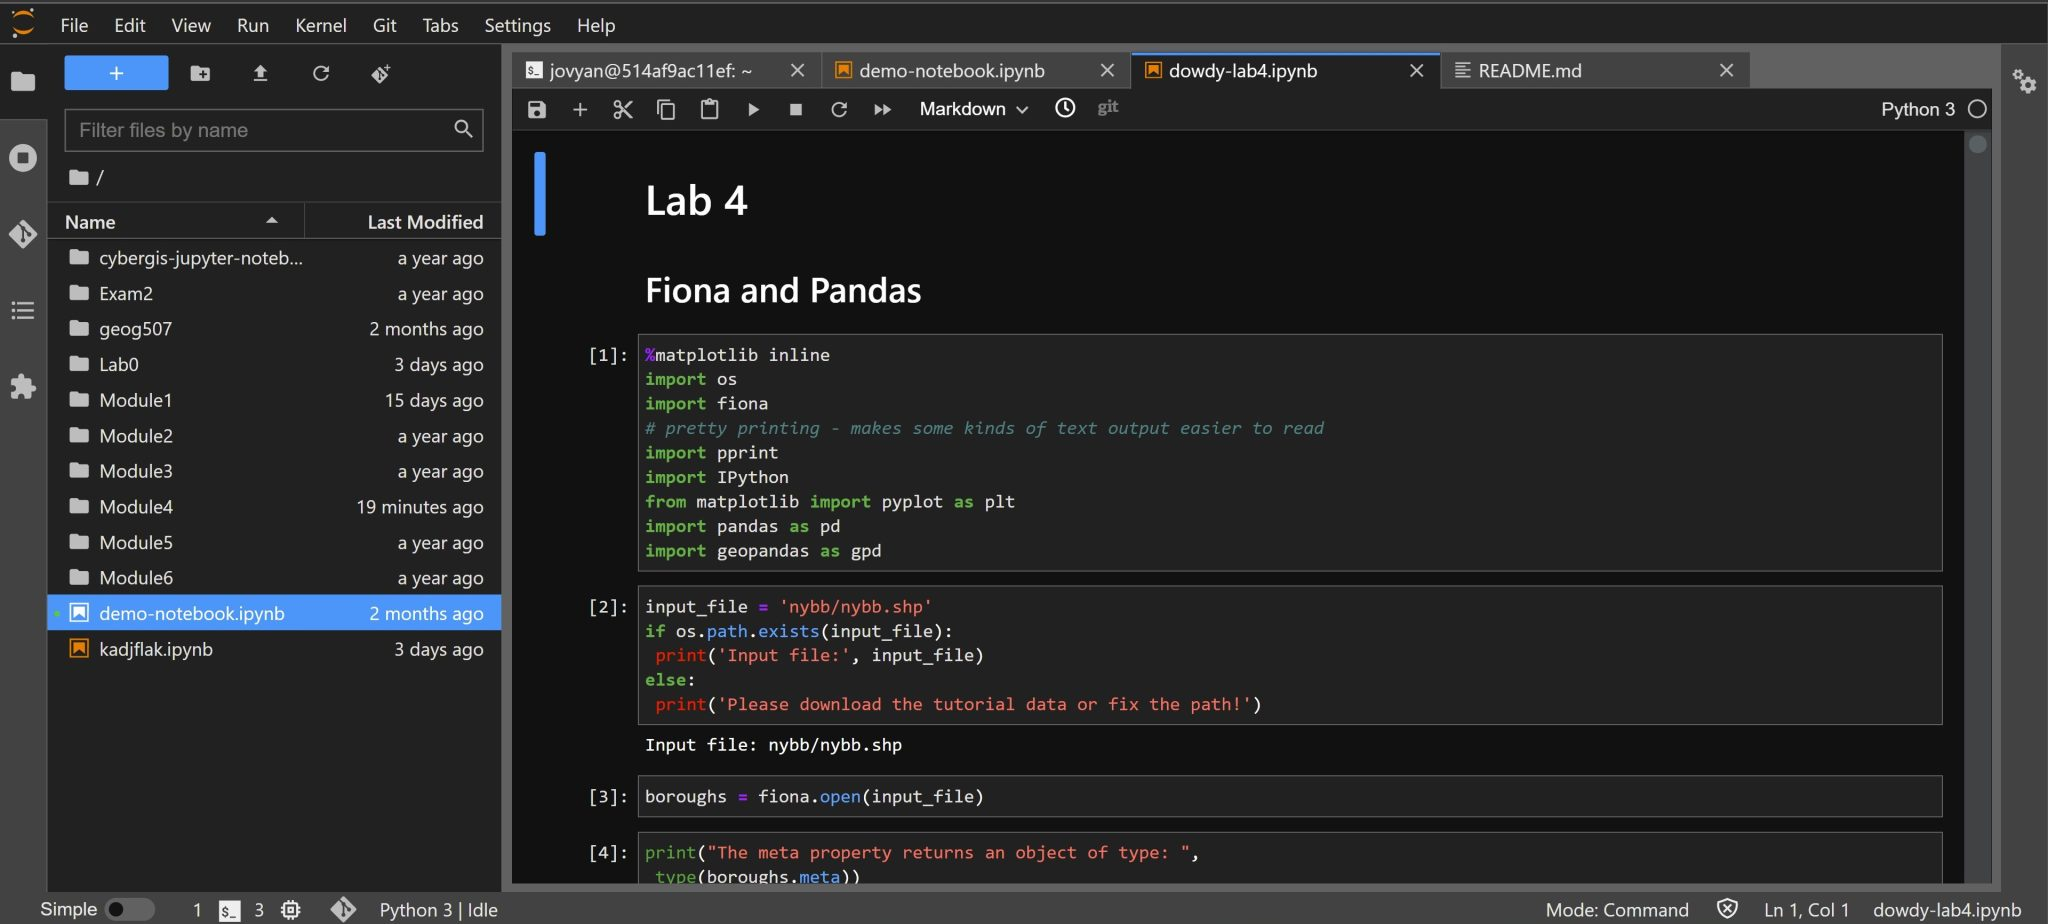

From the Settings menu, you can also change your font size, customize the text editor settings, and turn autosave on and off.

### The Left Sidebar

The left sidebar has a variety of components, including the File Browser:

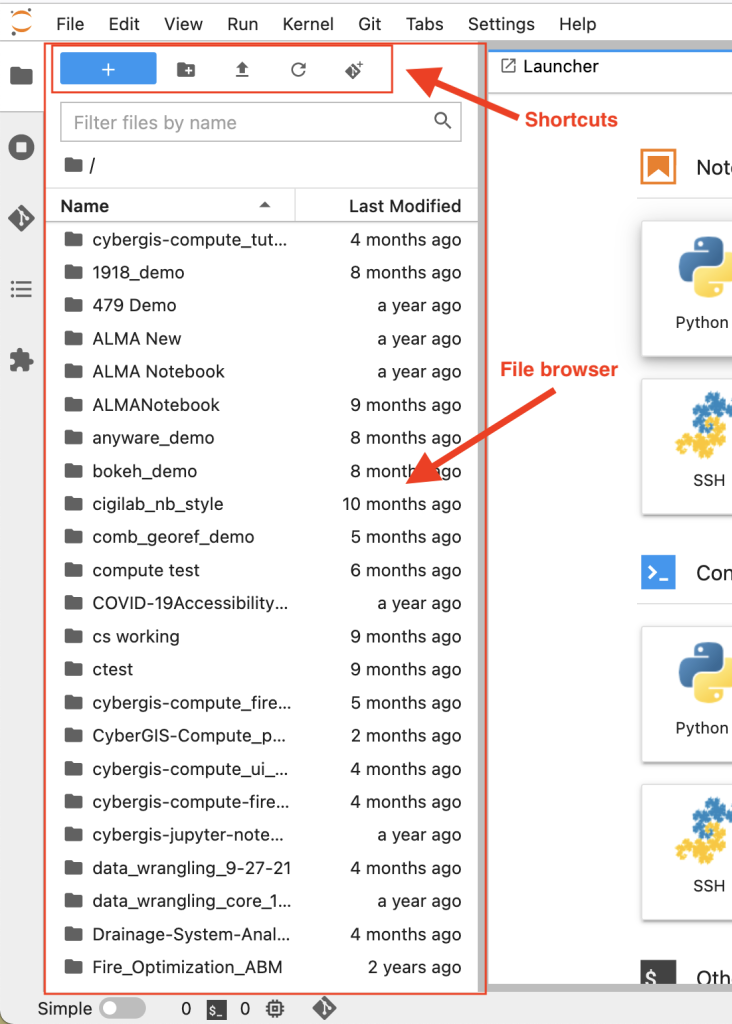


You can also use the "Running Content Pane" to see your open terminals, windows, and kernels:

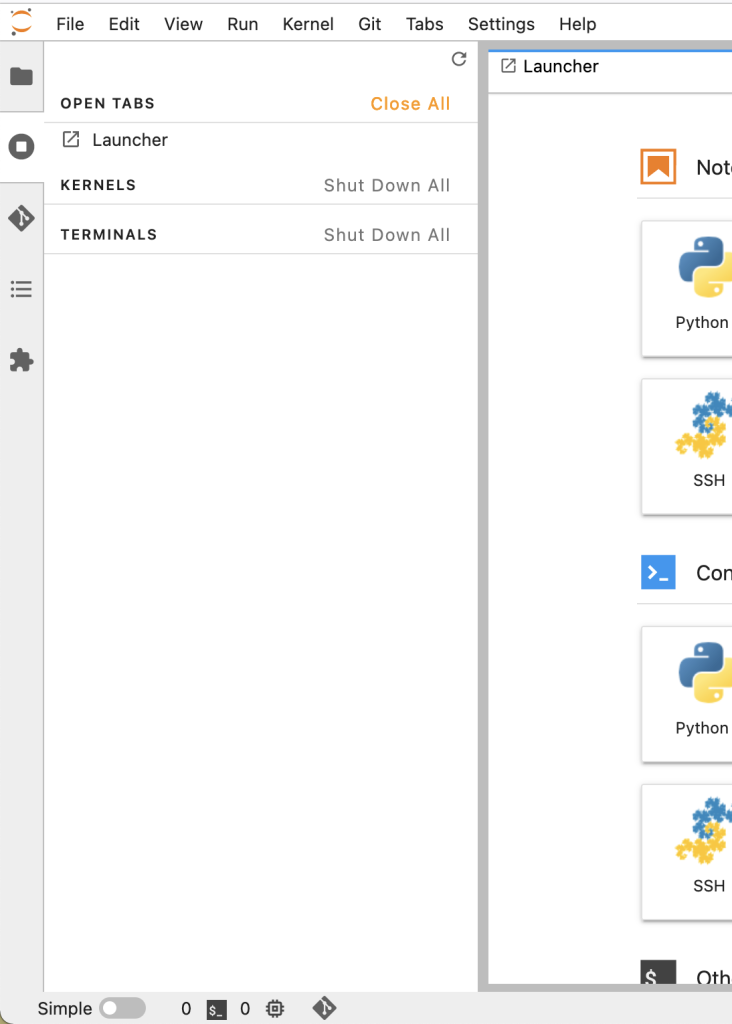

### Basics of Running Notebooks

Right below the name of the notebook is a menu you can use for running and editing notebooks:

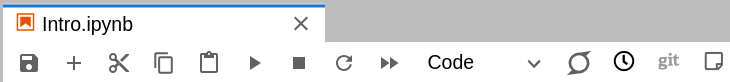

The "Run" button (Play/Triangle) executes a cell, but you can also use `CTRL+Enter` or `Shift+Enter` when selected on a cell. <font color='red'>Try that below:</font>

In [2]:
print("Hello world!")

Hello world!


The "Interrupt the Kernel" button (Stop/Square) interupts any code running in the notebook. <font color='red'>Run the cell below (which will loop forever) and then stop it:</font>

In [3]:
while True:
    time.sleep(1)

KeyboardInterrupt: 

You should see a "KeyboardInterrupt" error, this is expected when using the Stop button.

Note that you can also change the type of cell between Markdown (static text you're reading) and Code (runnable cells). 

<font color='red'>Select the cell below, change the type to Code, and run it:</font>

lower = 0
upper = 100

print("Prime numbers between", lower, "and", upper, "are:")

for num in range(lower, upper + 1):
    if num > 1:
        for i in range(2, num):
            if (num % i) == 0:
                break
        else:
            print(num)

A few other useful options exist in the Run menu:

* `Run All Above Selected Cell` 
* `Run Selected Cell and All Below`

...and in the Kernel menu:

* `Restart Kernel and Clear Outputs`
* `Restart Kernel and Run All Cells`

<hr id="examples" />

## Example Packages

We will walk through a handful of Python packages to demonstrate the functionalities of CyberGISX:

* **torch (pytorch)** for machine learning
* **geopandas & us** for geospatial processing and mapping

### torch

`torch` (pytorch) is a popular machine learning package in Python. Below we run one of their [basic examples to "learn" a sine function](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-tensors-and-autograd):

In [4]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print("Step: ", t, "Loss: ", loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

Step:  99 Loss:  543.3740234375
Step:  199 Loss:  362.293701171875
Step:  299 Loss:  242.55491638183594
Step:  399 Loss:  163.3769989013672
Step:  499 Loss:  111.02033233642578
Step:  599 Loss:  76.39939880371094
Step:  699 Loss:  53.506160736083984
Step:  799 Loss:  38.36796188354492
Step:  899 Loss:  28.35778045654297
Step:  999 Loss:  21.738466262817383
Step:  1099 Loss:  17.36147117614746
Step:  1199 Loss:  14.467140197753906
Step:  1299 Loss:  12.553241729736328
Step:  1399 Loss:  11.287646293640137
Step:  1499 Loss:  10.450798034667969
Step:  1599 Loss:  9.897425651550293
Step:  1699 Loss:  9.53150749206543
Step:  1799 Loss:  9.289533615112305
Step:  1899 Loss:  9.129525184631348
Step:  1999 Loss:  9.023723602294922
Result: y = 0.00021941961313132197 + 0.8427714109420776 x + -3.7854493712075055e-05 x^2 + -0.09134335815906525 x^3


Now, we can plot the results against a sine function to see how well we did:

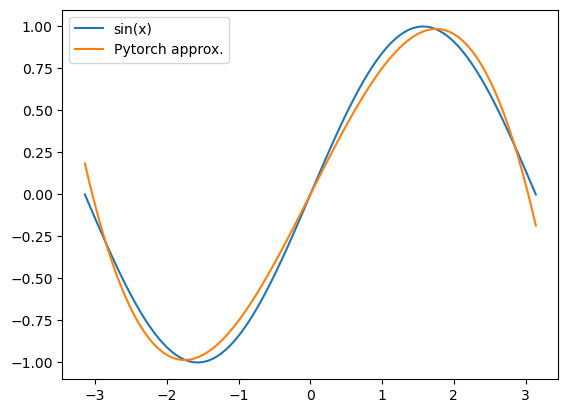

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-math.pi, math.pi, num=100)

y = [a.item() + b.item() * i + c.item() * i**2 + d.item() * i**3 for i in x]

plt.plot(x, np.sin(x), label="sin(x)")
plt.plot(x, y, label="Pytorch approx.")
plt.legend()
plt.show()

## geopandas & us

[geopandas](https://geopandas.org/en/stable/index.html) is a geospatial analysis package that extends the popular pandas package.

[us](https://github.com/unitedstates/python-us) is a simple package for working with United States spatial data and metadata

For this simple example, we will print the Federal Information Processing Standards (FIPS) codes for each state (think of this as a universal ID for them) and then plot the counties in Illinois using `us` data.

In [6]:
import us

for state in us.states.STATES:
    print(state, state.fips)

Alabama 01
Alaska 02
Arizona 04
Arkansas 05
California 06
Colorado 08
Connecticut 09
Delaware 10
Florida 12
Georgia 13
Hawaii 15
Idaho 16
Illinois 17
Indiana 18
Iowa 19
Kansas 20
Kentucky 21
Louisiana 22
Maine 23
Maryland 24
Massachusetts 25
Michigan 26
Minnesota 27
Mississippi 28
Missouri 29
Montana 30
Nebraska 31
Nevada 32
New Hampshire 33
New Jersey 34
New Mexico 35
New York 36
North Carolina 37
North Dakota 38
Ohio 39
Oklahoma 40
Oregon 41
Pennsylvania 42
Rhode Island 44
South Carolina 45
South Dakota 46
Tennessee 47
Texas 48
Utah 49
Vermont 50
Virginia 51
Washington 53
West Virginia 54
Wisconsin 55
Wyoming 56


The package can also easily grab shapefiles for us. Let's use `us` to get the URL to Illinois counties and then plot that data with geopandas:

In [7]:
us.states.IL.shapefile_urls()

{'tract': 'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_17_tract10.zip',
 'cd': 'https://www2.census.gov/geo/tiger/TIGER2010/CD/111/tl_2010_17_cd111.zip',
 'county': 'https://www2.census.gov/geo/tiger/TIGER2010/COUNTY/2010/tl_2010_17_county10.zip',
 'state': 'https://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_17_state10.zip',
 'zcta': 'https://www2.census.gov/geo/tiger/TIGER2010/ZCTA5/2010/tl_2010_17_zcta510.zip',
 'block': 'https://www2.census.gov/geo/tiger/TIGER2010/TABBLOCK/2010/tl_2010_17_tabblock10.zip',
 'blockgroup': 'https://www2.census.gov/geo/tiger/TIGER2010/BG/2010/tl_2010_17_bg10.zip'}

In [8]:
import geopandas as gpd

url_dict = us.states.IL.shapefile_urls()  # get urls
url = url_dict['county']  # grab the county one
gdf = gpd.read_file(url)  # read it with geopandas
gdf.explore()  # create an interactive map with folium through geopandas

<hr id="notes" />

## Notes on Using CyberGISX

* Note that your files are stored in `~/work` and everything there is persistent (will exist until you delete it), but outside of that directory (and its sub-directories) data might disappear. When you open the terminal, you will be in ~/, so just use `cd work` to get to your files.

### Working with Conda/Pip

* Note that installing packages/working with conda or pip in the terminal **will not** generally affect kernels. Why? First, because the terminal doesn't have any of the Python environments used by kernels loaded. However, you can use exclamation marks (`!`) to run shell/Bash commands in the notebook. For example, to list the packages in the kernel:

In [9]:
!conda list -p /cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.4

# packages in environment at /cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.4:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                  2_kmp_llvm    conda-forge
_tflow_select             2.3.0                       mkl    defaults
abseil-cpp                20210324.2           h9c3ff4c_0    conda-forge
absl-py                   1.4.0              pyhd8ed1ab_0    conda-forge
access                    1.1.9                    pypi_0    pypi
affine                    2.4.0              pyhd8ed1ab_0    conda-forge
aiobotocore               2.5.0              pyhd8ed1ab_0    conda-forge
aiohttp                   3.8.4            py38h01eb140_1    conda-forge
aioitertools              0.11.0             pyhd8ed1ab_0    conda-forge
aiosignal                 1.3.1              pyhd8ed1ab_0    conda-forge
alabaster                 0.7.13        

* Note that when running a command with `!` it spawns its own subshell so changes you make won't persist. For example, if we try to set an environment variable using `!`, it won't work:

In [10]:
!export MYVAR="hello there" # set the variable
!echo $MYVAR  # try to read it, but we get a blank

Setting a variable can still be done with Python though:

In [11]:
os.environ["MYVAR"] = "hello there" # set the variable
!echo $MYVAR  # try to read, it actually works this time

hello there


* The kernels we used are distributed/stored on the Cern Virtual Machine File System (CVMFS) which is read-only, thus you can't change the files there. For example, if we try to put a file there we will get an error:

In [12]:
!touch /cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.4/test.txt 

touch: cannot touch '/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.9.4/test.txt': Read-only file system


* When working with pip, we have set each kernel to have a different location so that installations across different kernels don't conflict with each other. This is done by setting the [$PYTHONUSERBASE environment variable](https://docs.python.org/3/using/cmdline.html#envvar-PYTHONUSERBASE).

In [13]:
!echo $PYTHONUSERBASE

/home/jovyan/.local/python3-0.9.4


* You can also interact with our modules using the Python module package:

In [14]:
import sys, os
sys.path.insert(0, os.path.join(os.environ['MODULESHOME'], "init"))
from env_modules_python import module
module("list")


Currently Loaded Modules:
  1) GCCcore/8.3.0                      44) x265/3.2-GCCcore-8.3.0
  2) zlib/1.2.11-GCCcore-8.3.0          45) util-linux/2.34-GCCcore-8.3.0
  3) binutils/2.32-GCCcore-8.3.0        46) fontconfig/2.13.1-GCCcore-8.3.0
  4) GCC/8.3.0                          47) xorg-macros/1.19.2-GCCcore-8.3.0
  5) numactl/2.0.12-GCCcore-8.3.0       48) X11/20190717-GCCcore-8.3.0
  6) XZ/5.2.4-GCCcore-8.3.0             49) FriBidi/1.0.5-GCCcore-8.3.0
  7) libxml2/2.9.9-GCCcore-8.3.0        50) FFmpeg/4.2.1-GCCcore-8.3.0
  8) libpciaccess/0.14-GCCcore-8.3.0    51) pixman/0.38.4-GCCcore-8.3.0
  9) hwloc/1.11.12-GCCcore-8.3.0        52) libffi/3.2.1-GCCcore-8.3.0
 10) OpenMPI/3.1.4-GCC-8.3.0            53) GLib/2.62.0-GCCcore-8.3.0
 11) OpenBLAS/0.3.7-GCC-8.3.0           54) cairo/1.16.0-GCCcore-8.3.0
 12) gompi/2019b                        55) GMP/6.1.2-GCCcore-8.3.0
 13) FFTW/3.3.8-gompi-2019b             56) nettle/3.5.1-GCCcore-8.3.0
 14) ScaLAPACK/2.0.2-gompi-2019b        57

(None,
 '\nCurrently Loaded Modules:\n  1) GCCcore/8.3.0                      44) x265/3.2-GCCcore-8.3.0\n  2) zlib/1.2.11-GCCcore-8.3.0          45) util-linux/2.34-GCCcore-8.3.0\n  3) binutils/2.32-GCCcore-8.3.0        46) fontconfig/2.13.1-GCCcore-8.3.0\n  4) GCC/8.3.0                          47) xorg-macros/1.19.2-GCCcore-8.3.0\n  5) numactl/2.0.12-GCCcore-8.3.0       48) X11/20190717-GCCcore-8.3.0\n  6) XZ/5.2.4-GCCcore-8.3.0             49) FriBidi/1.0.5-GCCcore-8.3.0\n  7) libxml2/2.9.9-GCCcore-8.3.0        50) FFmpeg/4.2.1-GCCcore-8.3.0\n  8) libpciaccess/0.14-GCCcore-8.3.0    51) pixman/0.38.4-GCCcore-8.3.0\n  9) hwloc/1.11.12-GCCcore-8.3.0        52) libffi/3.2.1-GCCcore-8.3.0\n 10) OpenMPI/3.1.4-GCC-8.3.0            53) GLib/2.62.0-GCCcore-8.3.0\n 11) OpenBLAS/0.3.7-GCC-8.3.0           54) cairo/1.16.0-GCCcore-8.3.0\n 12) gompi/2019b                        55) GMP/6.1.2-GCCcore-8.3.0\n 13) FFTW/3.3.8-gompi-2019b             56) nettle/3.5.1-GCCcore-8.3.0\n 14) ScaLAPACK/2.0

<hr id="learn-more" />

## Learn More

Papers, tutorials, and other resources to learn more about CyberGISX and related cyberinfrastructure.

### CyberGISX

* [EasyScienceGateway: A new framework for providing reproducible user environments on science gateways](https://doi.org/10.1002/cpe.7929)
* [Towards Reproducible Research on CyberGISX with Lmod and Easybuild](https://doi.org/10.5281/zenodo.5569659)

### CyberGIS-Compute/Cloud

* [CyberGIS-Cloud: A Unified Middleware Framework for Cloud-Based Geospatial Research and Education](https://doi.org/10.1145/3491418.3535148)
* [CyberGIS-Compute for Enabling Computationally Intensive Geospatial Research](https://doi.org/10.1145/3486189.3490017)
* [Enabling Computationally Intensive Geospatial Research on CyberGIS-Jupyter with CyberGIS-Compute](https://doi.org/10.5281/zenodo.5570056)

### Use-Cases

* [CyberGIS-Jupyter for Spatially Explicit Agent-based Modeling: A Case Study on Influenza Transmission](https://doi.org/10.1145/3356470.3365531)

### Related Work

* [
CyberGIS-Jupyter for Water - An Open Geospatial Computing Platform for Collaborative Water Research](https://ui.adsabs.harvard.edu/abs/2022AGUFMIN32A..05L)